In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [75]:
import pandas as pd
import numpy as np
import os

# 파일들이 있는 폴더명으로 폴더내 파일 목록 확인

forders = os.listdir('F:/HAR/UMAFall/FALL')
forders2 = os.listdir('F:/HAR/UMAFall/ADL')

In [76]:
df_fall = pd.DataFrame()   
df_adl = pd.DataFrame() 

In [77]:
df_fall.head()

""


In [78]:
df_adl.head()

""


In [79]:
for i in range(0,len(forders2)):
    if forders2[i].split('.')[1] == 'txt':        
        file = 'F:/HAR/UMAFall/ADL/'+forders2[i]
        df2 = pd.read_csv(file,encoding='utf-8', delimiter=r"\s+", names=["MPU_x","MPU_y","MPU_z"])  

        df2['subject'] = forders2[i].split('_')[2]    
        df2['type'] = forders2[i].split('_')[3] 
        df2['activity'] = forders2[i].split('_')[4] 
        df2['trial'] = forders2[i].split('_')[5]       
        df_adl = pd.concat([df_adl, df2]) 

In [80]:
df_adl.head()

,MPU_x,MPU_y,MPU_z,subject,type,activity,trial
0,1.011475,0.088867,-0.145508,18,ADL,Jogging,1
1,0.976562,0.007812,-0.049805,18,ADL,Jogging,1
2,0.976562,0.007812,-0.049805,18,ADL,Jogging,1
3,0.976562,0.007812,-0.049805,18,ADL,Jogging,1
4,0.976562,0.007812,-0.049805,18,ADL,Jogging,1


In [81]:
for i in range(0,len(forders)):
    if forders[i].split('.')[1] == 'txt':        
        file = 'F:/HAR/UMAFall/FALL/'+forders[i]
        df1 = pd.read_csv(file,encoding='utf-8', delimiter=r"\s+", names=["MPU_x","MPU_y","MPU_z"])  

        df1['subject'] = forders[i].split('_')[2]    
        df1['type'] = forders[i].split('_')[3] 
        df1['activity'] = forders[i].split('_')[4] 
        df1['trial'] = forders[i].split('_')[5]       
        df_fall = pd.concat([df_fall, df1]) 

In [82]:
df_fall.head()

,MPU_x,MPU_y,MPU_z,subject,type,activity,trial
0,0.924805,-0.282227,-0.110840,18,Fall,backwardFall,1
1,0.924805,-0.282227,-0.110840,18,Fall,backwardFall,1
2,1.004395,-0.331299,-0.117920,18,Fall,backwardFall,1
3,0.918945,-0.341309,-0.123535,18,Fall,backwardFall,1
4,0.926514,-0.288818,-0.189941,18,Fall,backwardFall,1


In [83]:
df_fall.head()

,MPU_x,MPU_y,MPU_z,subject,type,activity,trial
0,0.924805,-0.282227,-0.110840,18,Fall,backwardFall,1
1,0.924805,-0.282227,-0.110840,18,Fall,backwardFall,1
2,1.004395,-0.331299,-0.117920,18,Fall,backwardFall,1
3,0.918945,-0.341309,-0.123535,18,Fall,backwardFall,1
4,0.926514,-0.288818,-0.189941,18,Fall,backwardFall,1


<AxesSubplot:xlabel='subject', ylabel='count'>

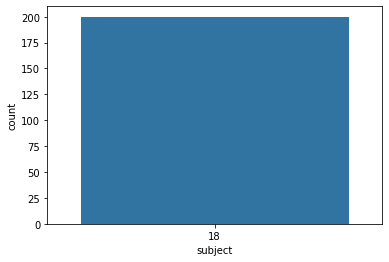

In [84]:
import seaborn as sns

sns.countplot(x = "subject", data = df_fall, order = df_fall.subject.value_counts().index)

<AxesSubplot:xlabel='activity', ylabel='count'>

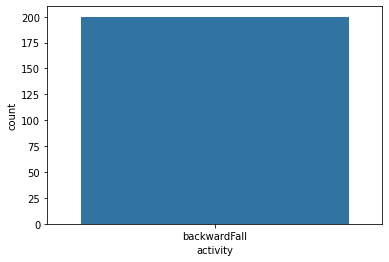

In [85]:
import seaborn as sns

sns.countplot(x = "activity", data = df_fall, order = df_fall.activity.value_counts().index)

<AxesSubplot:xlabel='subject', ylabel='count'>

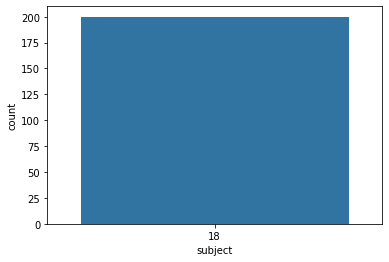

In [86]:
import seaborn as sns

sns.countplot(x = "subject", data = df_adl, order = df_adl.subject.value_counts().index)

<AxesSubplot:xlabel='activity', ylabel='count'>

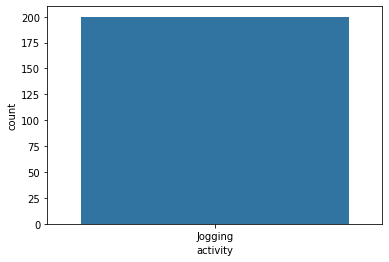

In [87]:
import seaborn as sns

sns.countplot(x = "activity", data = df_adl, order = df_adl.activity.value_counts().index)

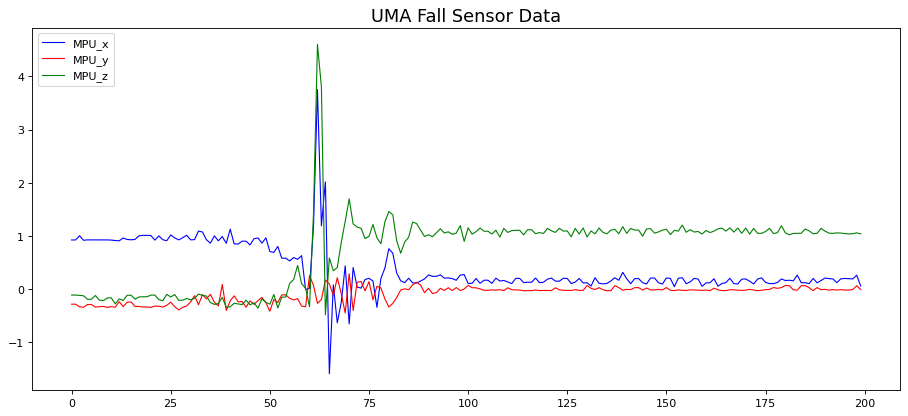

In [88]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(df_fall['MPU_x'], label='MPU_x', color='blue', animated = True, linewidth=1)
ax.plot(df_fall['MPU_y'], label='MPU_y', color='red', animated = True, linewidth=1)
ax.plot(df_fall['MPU_z'], label='MPU_z', color='green', animated = True, linewidth=1)
plt.legend(loc='upper left')
ax.set_title('UMA Fall Sensor Data', fontsize=16)
plt.show()

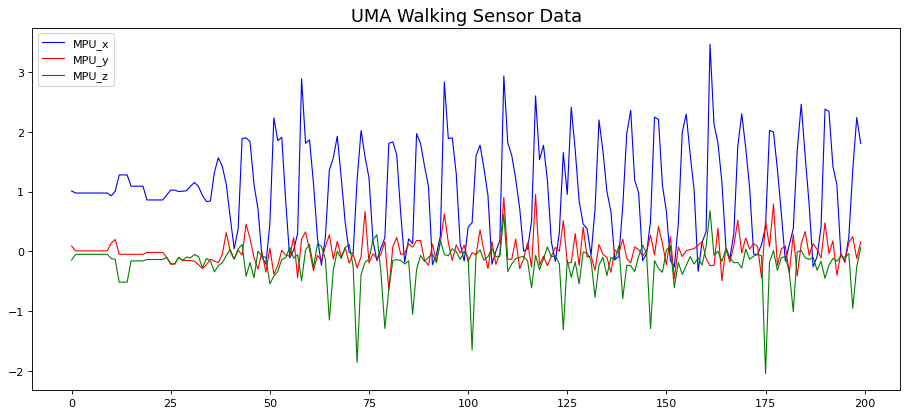

In [89]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(df_adl['MPU_x'], label='MPU_x', color='blue', animated = True, linewidth=1)
ax.plot(df_adl['MPU_y'], label='MPU_y', color='red', animated = True, linewidth=1)
ax.plot(df_adl['MPU_z'], label='MPU_z', color='green', animated = True, linewidth=1)
plt.legend(loc='upper left')
ax.set_title('UMA Walking Sensor Data', fontsize=16)
plt.show()

In [90]:
new_df_fall = df_fall[['MPU_x', 'MPU_y', 'MPU_z']]

In [91]:
new_df_fall.head()

,MPU_x,MPU_y,MPU_z
0,0.924805,-0.282227,-0.110840
1,0.924805,-0.282227,-0.110840
2,1.004395,-0.331299,-0.117920
3,0.918945,-0.341309,-0.123535
4,0.926514,-0.288818,-0.189941


In [92]:
new_df_adl = df_adl[['MPU_x', 'MPU_y', 'MPU_z']]

In [93]:
new_df_adl.head()

,MPU_x,MPU_y,MPU_z
0,1.011475,0.088867,-0.145508
1,0.976562,0.007812,-0.049805
2,0.976562,0.007812,-0.049805
3,0.976562,0.007812,-0.049805
4,0.976562,0.007812,-0.049805


In [94]:
train_fft = np.fft.fft(new_df_adl)
test_fft = np.fft.fft(new_df_fall)

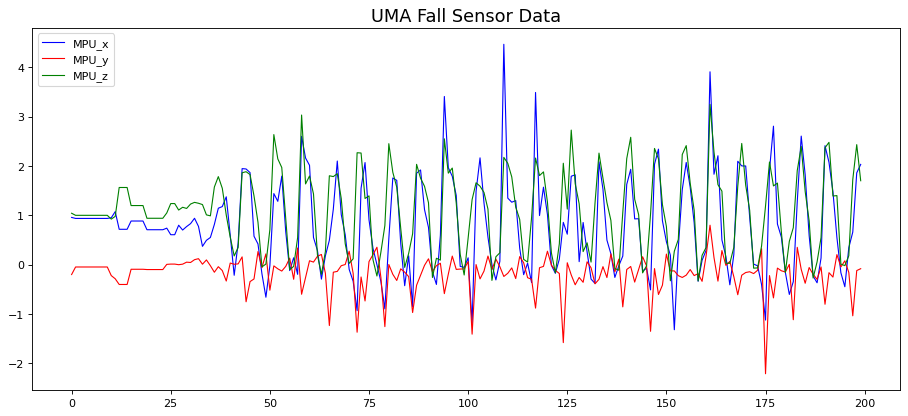

In [95]:
# frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='MPU_x', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].imag, label='MPU_y', color='red', animated = True, linewidth=1)
ax.plot(train_fft[:,2].real, label='MPU_z', color='green', animated = True, linewidth=1)
plt.legend(loc='upper left')
ax.set_title('UMA Fall Sensor Data', fontsize=16)
plt.show()

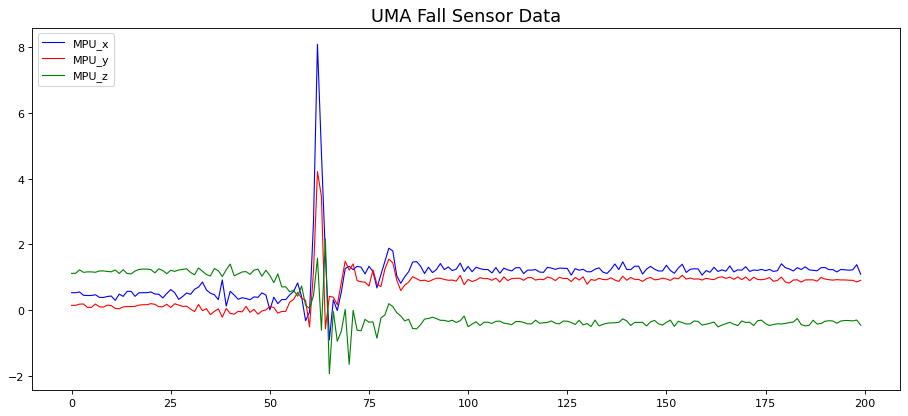

In [96]:
# frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='MPU_x', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='MPU_y', color='red', animated = True, linewidth=1)
ax.plot(test_fft[:,2].real, label='MPU_z', color='green', animated = True, linewidth=1)
plt.legend(loc='upper left')
ax.set_title('UMA Fall Sensor Data', fontsize=16)
plt.show()

In [97]:
import joblib

from sklearn.preprocessing import MinMaxScaler

# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(new_df_adl)
X_test = scaler.transform(new_df_fall)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [98]:
#reshape inputs for LSTM [samples, timesteps, features]

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (200, 1, 3)
Test data shape: (200, 1, 3)


In [99]:
import tensorflow as tf

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [100]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [101]:
#create the autoencoder model

model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 lstm_8 (LSTM)               (None, 1, 16)             1280      
                                                                 
 lstm_9 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 4)             0         
 or)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 1, 4)              144       
                                                                 
 lstm_11 (LSTM)              (None, 1, 16)             1344      
                                                           

In [102]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
19/19 [==============================] - 3s 27ms/step - loss: 0.4619 - val_loss: 0.4788
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4348 - val_loss: 0.4507
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4064 - val_loss: 0.4219
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3761 - val_loss: 0.3901
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3436 - val_loss: 0.3572
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3075 - val_loss: 0.3213
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2698 - val_loss: 0.2780
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2292 - val_loss: 0.2294
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1880 - val_loss: 0.1728
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1387 - val_loss: 0.1300
Epoch 11

19/19 [==============================] - 0s 3ms/step - loss: 0.0877 - val_loss: 0.1010
Epoch 84/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0879 - val_loss: 0.0998
Epoch 85/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0878 - val_loss: 0.1034
Epoch 86/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0871 - val_loss: 0.1027
Epoch 87/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0871 - val_loss: 0.1005
Epoch 88/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 0.1010
Epoch 89/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0863 - val_loss: 0.0992
Epoch 90/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0860 - val_loss: 0.0981
Epoch 91/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0856 - val_loss: 0.0959
Epoch 92/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0850 - val_loss: 0.0970
Epoch 93/100


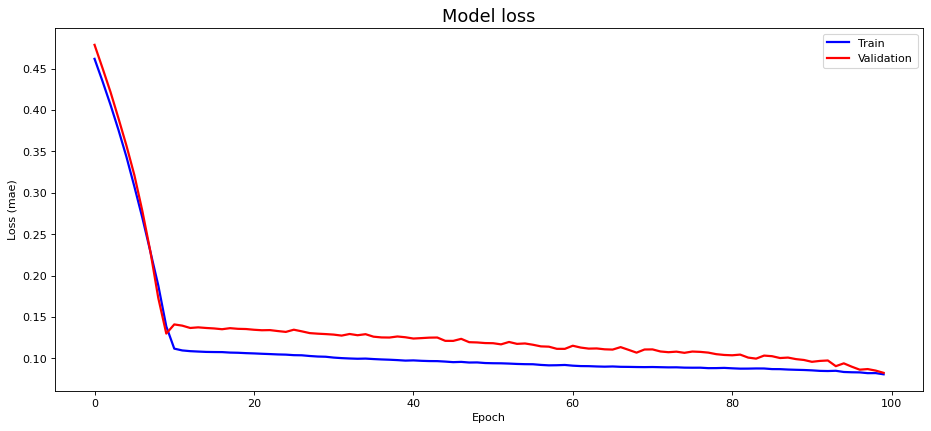

In [103]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

7/7 [==============================] - 0s 2ms/step


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

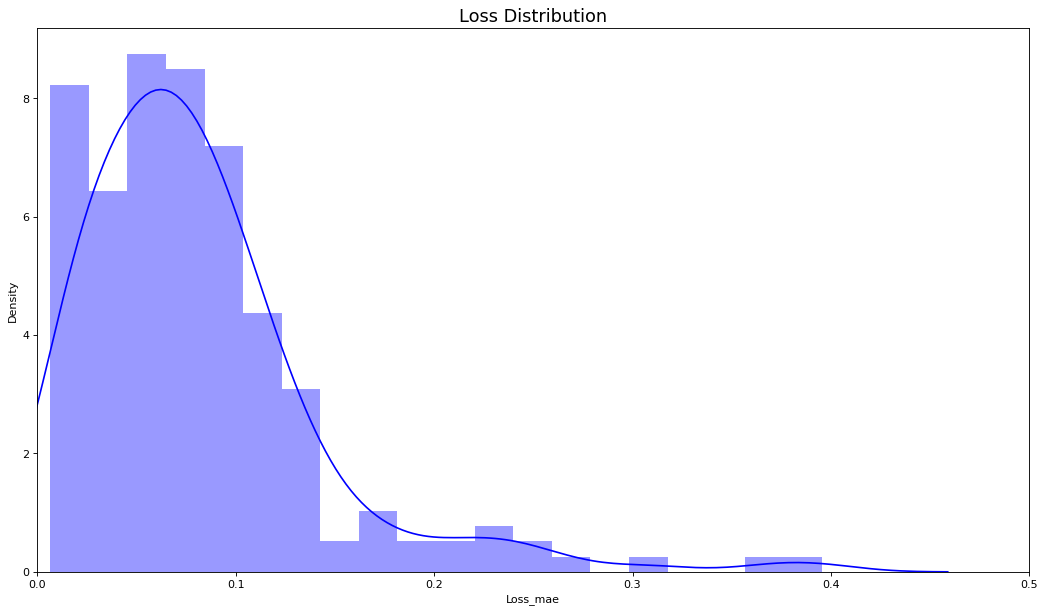

In [104]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=new_df_adl.columns)
X_pred.index = new_df_adl.index

scored = pd.DataFrame(index=new_df_adl.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [105]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=new_df_fall.columns)
X_pred.index = new_df_fall.index

scored = pd.DataFrame(index=new_df_fall.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.06
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

7/7 [==============================] - 0s 2ms/step


,Loss_mae,Threshold,Anomaly
0,0.064135,0.06,True
1,0.064135,0.06,True
2,0.081529,0.06,True
3,0.076678,0.06,True
4,0.061418,0.06,True


In [106]:
# calculate the same metrics for the training set 
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=new_df_adl.columns)
X_pred_train.index = new_df_adl.index

scored_train = pd.DataFrame(index=new_df_adl.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.3
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

7/7 [==============================] - 0s 2ms/step


<AxesSubplot:>

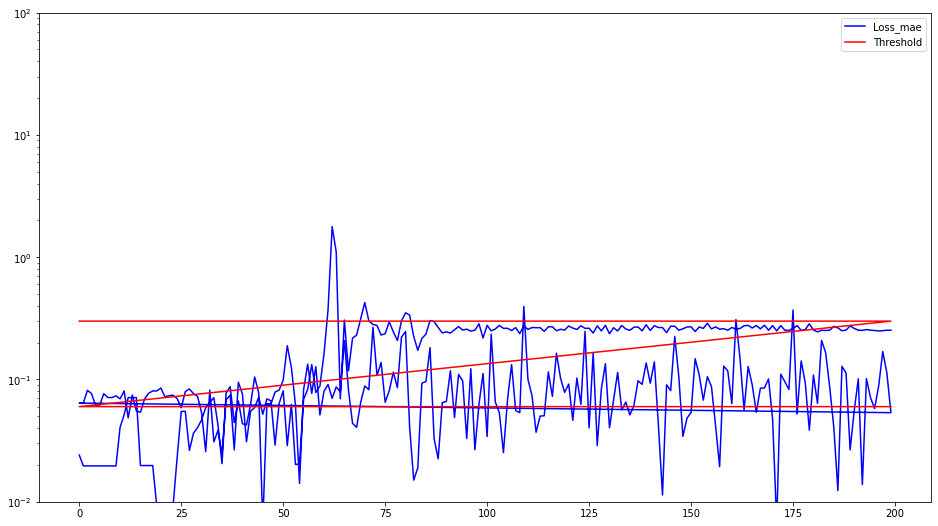

In [107]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])